In [20]:
import pandas as pd
df=pd.read_csv('red_spider_mite_forecast_data.csv')

In [21]:
df['Red_spider_mite_category'].value_counts()

Red_spider_mite_category
Low       8650
Medium    1062
High       228
Name: count, dtype: int64

In [22]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label,humidity_sensor_temp,pressure,vapor_pressure,rain_bucket_capacity,rain_bucket_tpm,fallen_rain_mm,wind_speed_mps,wind_direction,wind_gust_mps,wind_north_mps,wind_east_mps,latitude,longitude,x_orientation,y_orientation,air_temp,Red_spider_mite_count,Red_spider_mite_category,Pesticide_active,Resistance_level,Predation_pressure,Red_spider_mite_count_lag_1,Red_spider_mite_count_lag_3,Red_spider_mite_count_lag_7,Red_spider_mite_count_lag_14,Red_spider_mite_count_lag_21,Red_spider_mite_count_lag_30,temperature_lag_1,temperature_lag_3,temperature_lag_7,temperature_lag_14,temperature_lag_21,temperature_lag_30,humidity_lag_1,humidity_lag_3,humidity_lag_7,humidity_lag_14,humidity_lag_21,humidity_lag_30,rainfall_lag_1,rainfall_lag_3,rainfall_lag_7,rainfall_lag_14,rainfall_lag_21,rainfall_lag_30,Pesticide_active_lag_1,Pesticide_active_lag_3,Pesticide_active_lag_7,Pesticide_active_lag_14,Pesticide_active_lag_21,Pesticide_active_lag_30,Resistance_level_lag_1,Resistance_level_lag_3,Resistance_level_lag_7,Resistance_level_lag_14,Resistance_level_lag_21,Resistance_level_lag_30,wind_speed_mps_lag_1,wind_speed_mps_lag_3,wind_speed_mps_lag_7,wind_speed_mps_lag_14,wind_speed_mps_lag_21,wind_speed_mps_lag_30,pressure_lag_1,pressure_lag_3,pressure_lag_7,pressure_lag_14,pressure_lag_21,pressure_lag_30,vapor_pressure_lag_1,vapor_pressure_lag_3,vapor_pressure_lag_7,vapor_pressure_lag_14,vapor_pressure_lag_21,vapor_pressure_lag_30,count_roll_mean_3,count_roll_max_3,count_roll_min_3,count_roll_std_3,count_growth_rate_3,temperature_roll_mean_3,temperature_roll_std_3,temperature_roll_max_3,temperature_roll_min_3,temperature_extrema_3,humidity_roll_mean_3,humidity_roll_std_3,humidity_roll_max_3,humidity_roll_min_3,rainfall_roll_mean_3,rainfall_roll_std_3,rainfall_roll_sum_3,rainfall_roll_max_3,rainy_days_3,wind_speed_mps_roll_mean_3,wind_speed_mps_roll_std_3,pressure_roll_mean_3,pressure_roll_std_3,vapor_pressure_roll_mean_3,vapor_pressure_roll_std_3,count_roll_mean_7,count_roll_max_7,count_roll_min_7,count_roll_std_7,count_growth_rate_7,temperature_roll_mean_7,temperature_roll_std_7,temperature_roll_max_7,temperature_roll_min_7,temperature_extrema_7,humidity_roll_mean_7,humidity_roll_std_7,humidity_roll_max_7,humidity_roll_min_7,rainfall_roll_mean_7,rainfall_roll_std_7,rainfall_roll_sum_7,rainfall_roll_max_7,rainy_days_7,wind_speed_mps_roll_mean_7,wind_speed_mps_roll_std_7,pressure_roll_mean_7,pressure_roll_std_7,vapor_pressure_roll_mean_7,vapor_pressure_roll_std_7,count_roll_mean_14,count_roll_max_14,count_roll_min_14,count_roll_std_14,count_growth_rate_14,temperature_roll_mean_14,temperature_roll_std_14,temperature_roll_max_14,temperature_roll_min_14,temperature_extrema_14,humidity_roll_mean_14,humidity_roll_std_14,humidity_roll_max_14,humidity_roll_min_14,rainfall_roll_mean_14,rainfall_roll_std_14,rainfall_roll_sum_14,rainfall_roll_max_14,rainy_days_14,wind_speed_mps_roll_mean_14,wind_speed_mps_roll_std_14,pressure_roll_mean_14,pressure_roll_std_14,vapor_pressure_roll_mean_14,vapor_pressure_roll_std_14,count_roll_mean_30,count_roll_max_30,count_roll_min_30,count_roll_std_30,count_growth_rate_30,temperature_roll_mean_30,temperature_roll_std_30,temperature_roll_max_30,temperature_roll_min_30,temperature_extrema_30,humidity_roll_mean_30,humidity_roll_std_30,humidity_roll_max_30,humidity_roll_min_30,rainfall_roll_mean_30,rainfall_roll_std_30,rainfall_roll_sum_30,rainfall_roll_max_30,rainy_days_30,wind_speed_mps_roll_mean_30,wind_speed_mps_roll_std_30,pressure_roll_mean_30,pressure_roll_std_30,vapor_pressure_roll_mean_30,vapor_pressure_roll_std_30,count_roll_mean_60,count_roll_max_60,count_roll_min_60,count_roll_std_60,count_growth_rate_60,temperature_roll_mean_60,temperature_roll_std_60,temperature_roll_max_60,temperature_roll_min_60,temperature_extrema_60,humidity_roll_mean_60,humidity_roll_std_60,humidity_roll_max_60,humidity_roll_min_60,rainfall_roll_mean_60,rainfall_roll_std_60,rainfall_roll_sum_60

In [23]:
df.columns.tolist()

['Unnamed: 0',
 'N',
 'P',
 'K',
 'temperature',
 'humidity',
 'ph',
 'rainfall',
 'label',
 'humidity_sensor_temp',
 'pressure',
 'vapor_pressure',
 'rain_bucket_capacity',
 'rain_bucket_tpm',
 'fallen_rain_mm',
 'wind_speed_mps',
 'wind_direction',
 'wind_gust_mps',
 'wind_north_mps',
 'wind_east_mps',
 'latitude',
 'longitude',
 'x_orientation',
 'y_orientation',
 'air_temp',
 'Red_spider_mite_count',
 'Red_spider_mite_category',
 'Pesticide_active',
 'Resistance_level',
 'Predation_pressure',
 'Red_spider_mite_count_lag_1',
 'Red_spider_mite_count_lag_3',
 'Red_spider_mite_count_lag_7',
 'Red_spider_mite_count_lag_14',
 'Red_spider_mite_count_lag_21',
 'Red_spider_mite_count_lag_30',
 'temperature_lag_1',
 'temperature_lag_3',
 'temperature_lag_7',
 'temperature_lag_14',
 'temperature_lag_21',
 'temperature_lag_30',
 'humidity_lag_1',
 'humidity_lag_3',
 'humidity_lag_7',
 'humidity_lag_14',
 'humidity_lag_21',
 'humidity_lag_30',
 'rainfall_lag_1',
 'rainfall_lag_3',
 'rainfall_la

Initial shape: (9940, 235)
Missing values:
0
Shape after cleaning: (9940, 235)


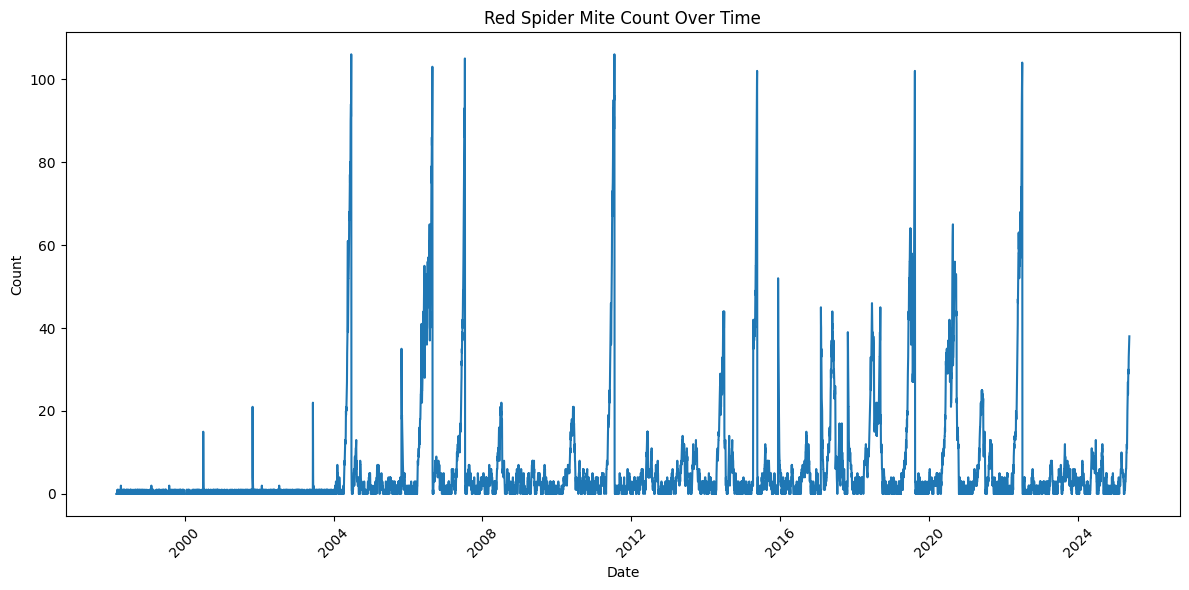

<Figure size 1200x600 with 0 Axes>

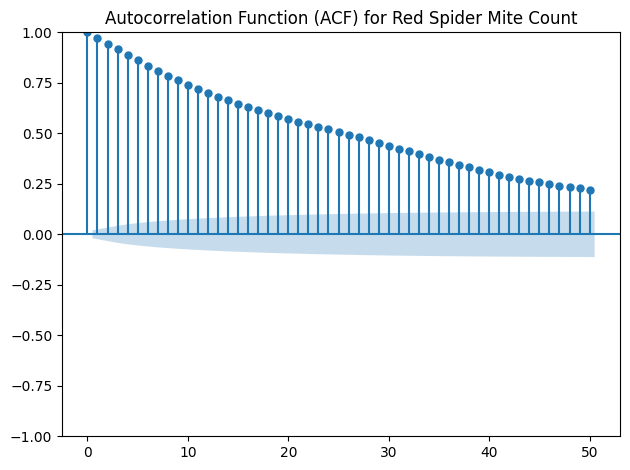

Outbreak risk threshold: 5.0


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
df = pd.read_csv('red_spider_mite_forecast_data.csv')

# Handle the date column
df['Date'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Date')
df = df.drop(columns=['Unnamed: 0'])
df = df.sort_index()

# Check for missing values and handle them
print(f"Initial shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum().sum()}")

# Drop rows with NaN values (since they're likely due to lag features)
df_cleaned = df.dropna()
print(f"Shape after cleaning: {df_cleaned.shape}")

# Explore the target variable
TARGET_VARIABLE = 'Red_spider_mite_count'
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned[TARGET_VARIABLE])
plt.title('Red Spider Mite Count Over Time')
plt.ylabel('Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check seasonality and autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(df_cleaned[TARGET_VARIABLE], lags=50)
plt.title('Autocorrelation Function (ACF) for Red Spider Mite Count')
plt.tight_layout()
plt.show()

# Create a binary target for outbreak risk
risk_threshold = df_cleaned[TARGET_VARIABLE].quantile(0.75)
print(f"Outbreak risk threshold: {risk_threshold}")
df_cleaned['is_outbreak_risk_1d'] = (df_cleaned[TARGET_VARIABLE].shift(-1) > risk_threshold).astype(int)

# Drop the last row where target is NaN
df_prepared = df_cleaned.dropna(subset=['is_outbreak_risk_1d'])

In [25]:
df_prepared.head()

,N,P,K,temperature,humidity,ph,rainfall,label,humidity_sensor_temp,pressure,vapor_pressure,rain_bucket_capacity,rain_bucket_tpm,fallen_rain_mm,wind_speed_mps,wind_direction,wind_gust_mps,wind_north_mps,wind_east_mps,latitude,longitude,x_orientation,y_orientation,air_temp,Red_spider_mite_count,Red_spider_mite_category,Pesticide_active,Resistance_level,Predation_pressure,Red_spider_mite_count_lag_1,Red_spider_mite_count_lag_3,Red_spider_mite_count_lag_7,Red_spider_mite_count_lag_14,Red_spider_mite_count_lag_21,Red_spider_mite_count_lag_30,temperature_lag_1,temperature_lag_3,temperature_lag_7,temperature_lag_14,temperature_lag_21,temperature_lag_30,humidity_lag_1,humidity_lag_3,humidity_lag_7,humidity_lag_14,humidity_lag_21,humidity_lag_30,rainfall_lag_1,rainfall_lag_3,rainfall_lag_7,rainfall_lag_14,rainfall_lag_21,rainfall_lag_30,Pesticide_active_lag_1,Pesticide_active_lag_3,Pesticide_active_lag_7,Pesticide_active_lag_14,Pesticide_active_lag_21,Pesticide_active_lag_30,Resistance_level_lag_1,Resistance_level_lag_3,Resistance_level_lag_7,Resistance_level_lag_14,Resistance_level_lag_21,Resistance_level_lag_30,wind_speed_mps_lag_1,wind_speed_mps_lag_3,wind_speed_mps_lag_7,wind_speed_mps_lag_14,wind_speed_mps_lag_21,wind_speed_mps_lag_30,pressure_lag_1,pressure_lag_3,pressure_lag_7,pressure_lag_14,pressure_lag_21,pressure_lag_30,vapor_pressure_lag_1,vapor_pressure_lag_3,vapor_pressure_lag_7,vapor_pressure_lag_14,vapor_pressure_lag_21,vapor_pressure_lag_30,count_roll_mean_3,count_roll_max_3,count_roll_min_3,count_roll_std_3,count_growth_rate_3,temperature_roll_mean_3,temperature_roll_std_3,temperature_roll_max_3,temperature_roll_min_3,temperature_extrema_3,humidity_roll_mean_3,humidity_roll_std_3,humidity_roll_max_3,humidity_roll_min_3,rainfall_roll_mean_3,rainfall_roll_std_3,rainfall_roll_sum_3,rainfall_roll_max_3,rainy_days_3,wind_speed_mps_roll_mean_3,wind_speed_mps_roll_std_3,pressure_roll_mean_3,pressure_roll_std_3,vapor_pressure_roll_mean_3,vapor_pressure_roll_std_3,count_roll_mean_7,count_roll_max_7,count_roll_min_7,count_roll_std_7,count_growth_rate_7,temperature_roll_mean_7,temperature_roll_std_7,temperature_roll_max_7,temperature_roll_min_7,temperature_extrema_7,humidity_roll_mean_7,humidity_roll_std_7,humidity_roll_max_7,humidity_roll_min_7,rainfall_roll_mean_7,rainfall_roll_std_7,rainfall_roll_sum_7,rainfall_roll_max_7,rainy_days_7,wind_speed_mps_roll_mean_7,wind_speed_mps_roll_std_7,pressure_roll_mean_7,pressure_roll_std_7,vapor_pressure_roll_mean_7,vapor_pressure_roll_std_7,count_roll_mean_14,count_roll_max_14,count_roll_min_14,count_roll_std_14,count_growth_rate_14,temperature_roll_mean_14,temperature_roll_std_14,temperature_roll_max_14,temperature_roll_min_14,temperature_extrema_14,humidity_roll_mean_14,humidity_roll_std_14,humidity_roll_max_14,humidity_roll_min_14,rainfall_roll_mean_14,rainfall_roll_std_14,rainfall_roll_sum_14,rainfall_roll_max_14,rainy_days_14,wind_speed_mps_roll_mean_14,wind_speed_mps_roll_std_14,pressure_roll_mean_14,pressure_roll_std_14,vapor_pressure_roll_mean_14,vapor_pressure_roll_std_14,count_roll_mean_30,count_roll_max_30,count_roll_min_30,count_roll_std_30,count_growth_rate_30,temperature_roll_mean_30,temperature_roll_std_30,temperature_roll_max_30,temperature_roll_min_30,temperature_extrema_30,humidity_roll_mean_30,humidity_roll_std_30,humidity_roll_max_30,humidity_roll_min_30,rainfall_roll_mean_30,rainfall_roll_std_30,rainfall_roll_sum_30,rainfall_roll_max_30,rainy_days_30,wind_speed_mps_roll_mean_30,wind_speed_mps_roll_std_30,pressure_roll_mean_30,pressure_roll_std_30,vapor_pressure_roll_mean_30,vapor_pressure_roll_std_30,count_roll_mean_60,count_roll_max_60,count_roll_min_60,count_roll_std_60,count_growth_rate_60,temperature_roll_mean_60,temperature_roll_std_60,temperature_roll_max_60,temperature_roll_min_60,temperature_extrema_60,humidity_roll_mean_60,humidity_roll_std_60,humidity_roll_max_60,humidity_roll_min_60,rainfall_roll_mean_60,rainfall_roll_std_60,rainfall_roll_sum_60,rainfall_r

In [26]:
# Get final feature list (excluding target-related variables)
exclude_pattern = ['Red_spider_mite', 'target_', 'count_roll', 'count_growth', 'latitude', 'longitude', 'x_orientation', 'y_orientation']
features = [col for col in df_prepared.columns
           if not any(pattern in col for pattern in exclude_pattern)
           and col != 'is_outbreak_risk_1d']

# Clean up after adding features
df_prepared = df_prepared.dropna()

print(f"Final number of features: {len(features)}")
X = df_prepared[features]
y = df_prepared['is_outbreak_risk_1d']

Final number of features: 186


In [27]:
y.value_counts()

is_outbreak_risk_1d
0    7800
1    2140
Name: count, dtype: int64

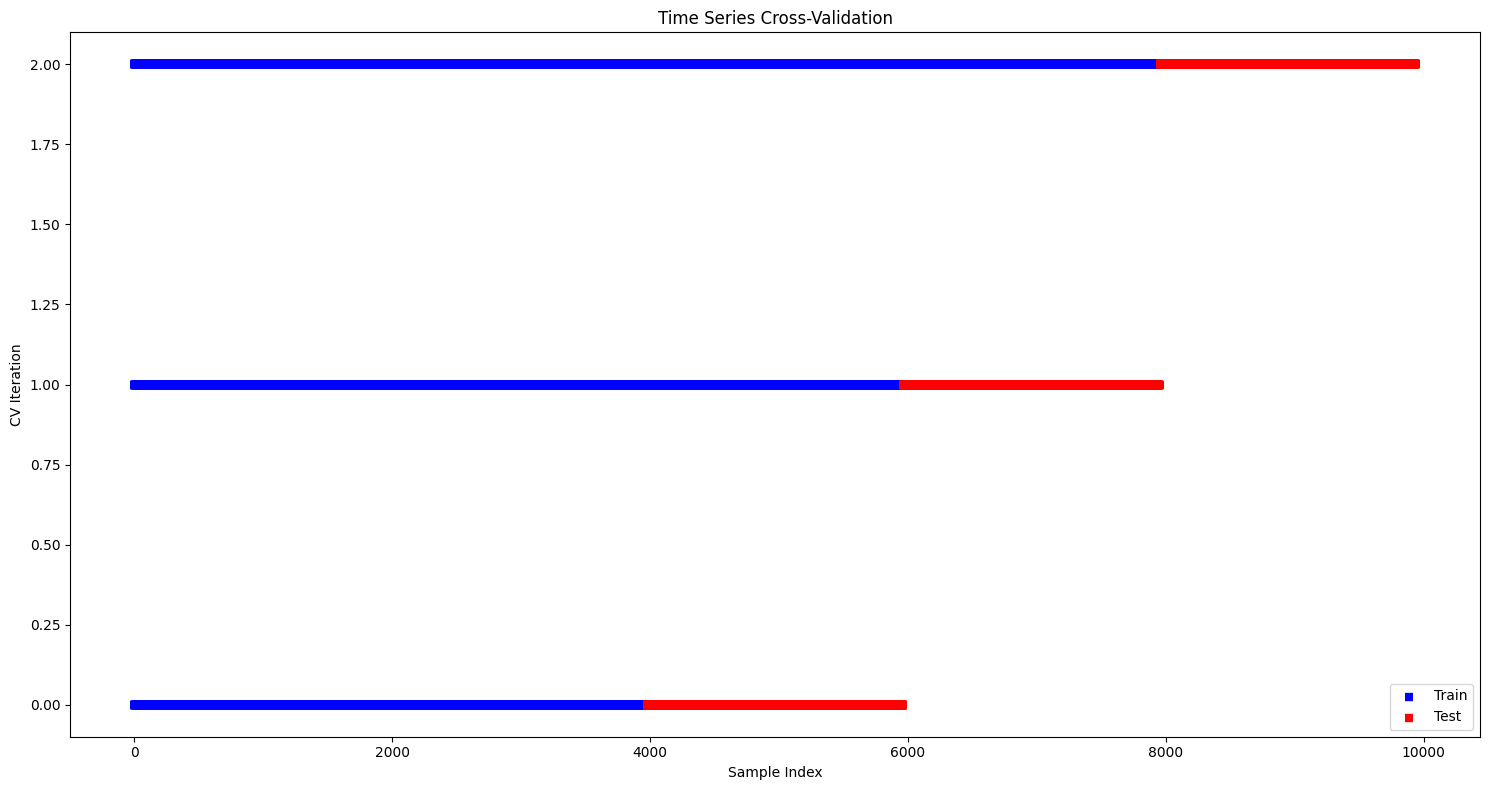

Training set: (7952, 186), Test set: (1988, 186)
Training period: 1998-03-02 00:00:00 to 2019-12-08 00:00:00
Testing period: 2019-12-09 00:00:00 to 2025-05-18 00:00:00


In [28]:
from sklearn.model_selection import TimeSeriesSplit

# Create a time series split for proper validation
tscv = TimeSeriesSplit(n_splits=3, test_size=int(0.2 * len(X)))

# Visualize the splits
plt.figure(figsize=(15, 8))
for i, (train_idx, test_idx) in enumerate(tscv.split(X)):
    train_mask = np.zeros(len(X), dtype=bool)
    test_mask = np.zeros(len(X), dtype=bool)
    train_mask[train_idx] = True
    test_mask[test_idx] = True

    plt.scatter(np.where(train_mask)[0], [i] * len(train_idx),
               c='blue', marker='_', lw=6, label='Train' if i == 0 else "")
    plt.scatter(np.where(test_mask)[0], [i] * len(test_idx),
               c='red', marker='_', lw=6, label='Test' if i == 0 else "")

plt.legend(loc='best')
plt.title('Time Series Cross-Validation')
plt.xlabel('Sample Index')
plt.ylabel('CV Iteration')
plt.tight_layout()
plt.show()

# Final chronological train-test split for model evaluation
train_size = int(0.8 * len(X))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Training period: {X_train.index.min()} to {X_train.index.max()}")
print(f"Testing period: {X_test.index.min()} to {X_test.index.max()}")

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

# First, identify categorical columns in X_train
categorical_cols = []
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        categorical_cols.append(col)
        print(f"Categorical column found: {col} with values: {X_train[col].unique()[:5]}")

# Create preprocessing pipeline with both numeric and categorical transformers
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]
print(f"Number of numeric columns: {len(numeric_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit the preprocessor and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to sparse matrices if needed
from scipy.sparse import issparse
if issparse(X_train_processed):
    X_train_processed = X_train_processed.toarray()
    X_test_processed = X_test_processed.toarray()

print(f"Processed X_train shape: {X_train_processed.shape}")
print(f"Processed X_test shape: {X_test_processed.shape}")

Categorical column found: label with values: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas']
Number of numeric columns: 185
Number of categorical columns: 1
Processed X_train shape: (7952, 212)
Processed X_test shape: (1988, 212)


In [30]:
onehotencoder = preprocessor.named_transformers_['cat']
if len(categorical_cols) > 0:
    encoded_feature_names = onehotencoder.get_feature_names_out(categorical_cols)
    feature_names = numeric_cols + list(encoded_feature_names)
else:
    feature_names = numeric_cols

X_train_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

In [31]:
X_train_df.head()

,N,P,K,temperature,humidity,ph,rainfall,humidity_sensor_temp,pressure,vapor_pressure,rain_bucket_capacity,rain_bucket_tpm,fallen_rain_mm,wind_speed_mps,wind_direction,wind_gust_mps,wind_north_mps,wind_east_mps,air_temp,Pesticide_active,Resistance_level,Predation_pressure,temperature_lag_1,temperature_lag_3,temperature_lag_7,temperature_lag_14,temperature_lag_21,temperature_lag_30,humidity_lag_1,humidity_lag_3,humidity_lag_7,humidity_lag_14,humidity_lag_21,humidity_lag_30,rainfall_lag_1,rainfall_lag_3,rainfall_lag_7,rainfall_lag_14,rainfall_lag_21,rainfall_lag_30,Pesticide_active_lag_1,Pesticide_active_lag_3,Pesticide_active_lag_7,Pesticide_active_lag_14,Pesticide_active_lag_21,Pesticide_active_lag_30,Resistance_level_lag_1,Resistance_level_lag_3,Resistance_level_lag_7,Resistance_level_lag_14,Resistance_level_lag_21,Resistance_level_lag_30,wind_speed_mps_lag_1,wind_speed_mps_lag_3,wind_speed_mps_lag_7,wind_speed_mps_lag_14,wind_speed_mps_lag_21,wind_speed_mps_lag_30,pressure_lag_1,pressure_lag_3,pressure_lag_7,pressure_lag_14,pressure_lag_21,pressure_lag_30,vapor_pressure_lag_1,vapor_pressure_lag_3,vapor_pressure_lag_7,vapor_pressure_lag_14,vapor_pressure_lag_21,vapor_pressure_lag_30,temperature_roll_mean_3,temperature_roll_std_3,temperature_roll_max_3,temperature_roll_min_3,temperature_extrema_3,humidity_roll_mean_3,humidity_roll_std_3,humidity_roll_max_3,humidity_roll_min_3,rainfall_roll_mean_3,rainfall_roll_std_3,rainfall_roll_sum_3,rainfall_roll_max_3,rainy_days_3,wind_speed_mps_roll_mean_3,wind_speed_mps_roll_std_3,pressure_roll_mean_3,pressure_roll_std_3,vapor_pressure_roll_mean_3,vapor_pressure_roll_std_3,temperature_roll_mean_7,temperature_roll_std_7,temperature_roll_max_7,temperature_roll_min_7,temperature_extrema_7,humidity_roll_mean_7,humidity_roll_std_7,humidity_roll_max_7,humidity_roll_min_7,rainfall_roll_mean_7,rainfall_roll_std_7,rainfall_roll_sum_7,rainfall_roll_max_7,rainy_days_7,wind_speed_mps_roll_mean_7,wind_speed_mps_roll_std_7,pressure_roll_mean_7,pressure_roll_std_7,vapor_pressure_roll_mean_7,vapor_pressure_roll_std_7,temperature_roll_mean_14,temperature_roll_std_14,temperature_roll_max_14,temperature_roll_min_14,temperature_extrema_14,humidity_roll_mean_14,humidity_roll_std_14,humidity_roll_max_14,humidity_roll_min_14,rainfall_roll_mean_14,rainfall_roll_std_14,rainfall_roll_sum_14,rainfall_roll_max_14,rainy_days_14,wind_speed_mps_roll_mean_14,wind_speed_mps_roll_std_14,pressure_roll_mean_14,pressure_roll_std_14,vapor_pressure_roll_mean_14,vapor_pressure_roll_std_14,temperature_roll_mean_30,temperature_roll_std_30,temperature_roll_max_30,temperature_roll_min_30,temperature_extrema_30,humidity_roll_mean_30,humidity_roll_std_30,humidity_roll_max_30,humidity_roll_min_30,rainfall_roll_mean_30,rainfall_roll_std_30,rainfall_roll_sum_30,rainfall_roll_max_30,rainy_days_30,wind_speed_mps_roll_mean_30,wind_speed_mps_roll_std_30,pressure_roll_mean_30,pressure_roll_std_30,vapor_pressure_roll_mean_30,vapor_pressure_roll_std_30,temperature_roll_mean_60,temperature_roll_std_60,temperature_roll_max_60,temperature_roll_min_60,temperature_extrema_60,humidity_roll_mean_60,humidity_roll_std_60,humidity_roll_max_60,humidity_roll_min_60,rainfall_roll_mean_60,rainfall_roll_std_60,rainfall_roll_sum_60,rainfall_roll_max_60,rainy_days_60,wind_speed_mps_roll_mean_60,wind_speed_mps_roll_std_60,pressure_roll_mean_60,pressure_roll_std_60,vapor_pressure_roll_mean_60,vapor_pressure_roll_std_60,month,day_of_year,day_of_week,week_of_year,quarter,year,days_from_start,month_sin,month_cos,day_of_year_sin,day_of_year_cos,temp_humid_interaction,rain_temp_interaction,optimal_growth_condition,recent_pesticide,label_apple,label_banana,label_bean,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_cucumber,label_grapes,label_jute,label_kidneybeans,label_lentil,label_maize,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_rose,label_straw

In [32]:
list(X_train_df.columns)

['N',
 'P',
 'K',
 'temperature',
 'humidity',
 'ph',
 'rainfall',
 'humidity_sensor_temp',
 'pressure',
 'vapor_pressure',
 'rain_bucket_capacity',
 'rain_bucket_tpm',
 'fallen_rain_mm',
 'wind_speed_mps',
 'wind_direction',
 'wind_gust_mps',
 'wind_north_mps',
 'wind_east_mps',
 'air_temp',
 'Pesticide_active',
 'Resistance_level',
 'Predation_pressure',
 'temperature_lag_1',
 'temperature_lag_3',
 'temperature_lag_7',
 'temperature_lag_14',
 'temperature_lag_21',
 'temperature_lag_30',
 'humidity_lag_1',
 'humidity_lag_3',
 'humidity_lag_7',
 'humidity_lag_14',
 'humidity_lag_21',
 'humidity_lag_30',
 'rainfall_lag_1',
 'rainfall_lag_3',
 'rainfall_lag_7',
 'rainfall_lag_14',
 'rainfall_lag_21',
 'rainfall_lag_30',
 'Pesticide_active_lag_1',
 'Pesticide_active_lag_3',
 'Pesticide_active_lag_7',
 'Pesticide_active_lag_14',
 'Pesticide_active_lag_21',
 'Pesticide_active_lag_30',
 'Resistance_level_lag_1',
 'Resistance_level_lag_3',
 'Resistance_level_lag_7',
 'Resistance_level_lag_14'

In [33]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model 1: LightGBM with time-based parameters
print("Training LightGBM Classifier...")
lgb_model = lgb.LGBMClassifier(objective='binary',
                           metric='auc',
                           n_estimators=150,
                           learning_rate=0.05,
                           num_leaves=31,
                           max_depth=-1,
                           is_unbalance=True, # Simpler way to handle imbalance in LGBM
                           random_state=42,
                           n_jobs=-1)
lgb_model.fit(X_train_processed, y_train)

# Model 2: Logistic Regression
print("Training Logistic Regression model...")
lr_model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
lr_model.fit(
    X_train_processed, y_train
)

# Model 3: Gradient Boosting Classifier
print("Training Gradient Boosting Classifier model...")
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
gb_model.fit(
    X_train_processed, y_train
)

# Model 4: XGBoost with time-based parameters
print("Training XGBoost model...")
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight_xgb = neg_count / pos_count if pos_count > 0 else 1
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight_xgb:.2f}")

xgb_model = XGBClassifier(objective='binary:logistic',
                           eval_metric='auc', # Evaluate with AUC during training
                           n_estimators=150,
                           learning_rate=0.05,
                           max_depth=6,
                           subsample=0.8,
                           colsample_bytree=0.8,
                           gamma=0.1, # Regularization
                           scale_pos_weight=scale_pos_weight_xgb, # Handle imbalance
                           random_state=42,
                           use_label_encoder=False, # Recommended
                           n_jobs=-1)
xgb_model.fit(X_train_processed, y_train)

# Model 5: Random Forest
print("Training Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_processed, y_train)

# Model 6: Time Series Classification with Prophet
# (for demonstration - actual implementation would be more complex)
print("Training Prophet model...")
# This is a simplified example - Prophet normally requires more setup
prophet_train = pd.DataFrame({
    'ds': X_train.index,
    'y': y_train
})
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
prophet_model.fit(prophet_train)

Training LightGBM Classifier...
[LightGBM] [Info] Number of positive: 1602, number of negative: 6350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39364
[LightGBM] [Info] Number of data points in the train set: 7952, number of used features: 204
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201459 -> initscore=-1.377202
[LightGBM] [Info] Start training from score -1.377202
Training Logistic Regression model...
Training Gradient Boosting Classifier model...
Training XGBoost model...
Calculated scale_pos_weight for XGBoost: 3.96
Training Random Forest model...
Training Prophet model...


09:55:09 - cmdstanpy - INFO - Chain [1] start processing
09:55:10 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
# Evaluate all models
models = {
    'LightGBM': lgb_model,
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'Gradient Boosting': gb_model
}

results = {}
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

    # Calculate metrics
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_pred_proba)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     accuracy  precision    recall        f1       auc
LightGBM             0.878270   0.730530  0.871747  0.794915  0.947877
XGBoost              0.852616   0.671809  0.890335  0.765787  0.940117
Random Forest        0.818410   0.627706  0.808550  0.706742  0.897429
Logistic Regression  0.915493   0.891949  0.782528  0.833663  0.958075
Gradient Boosting    0.889839   0.766277  0.853160  0.807388  0.939168


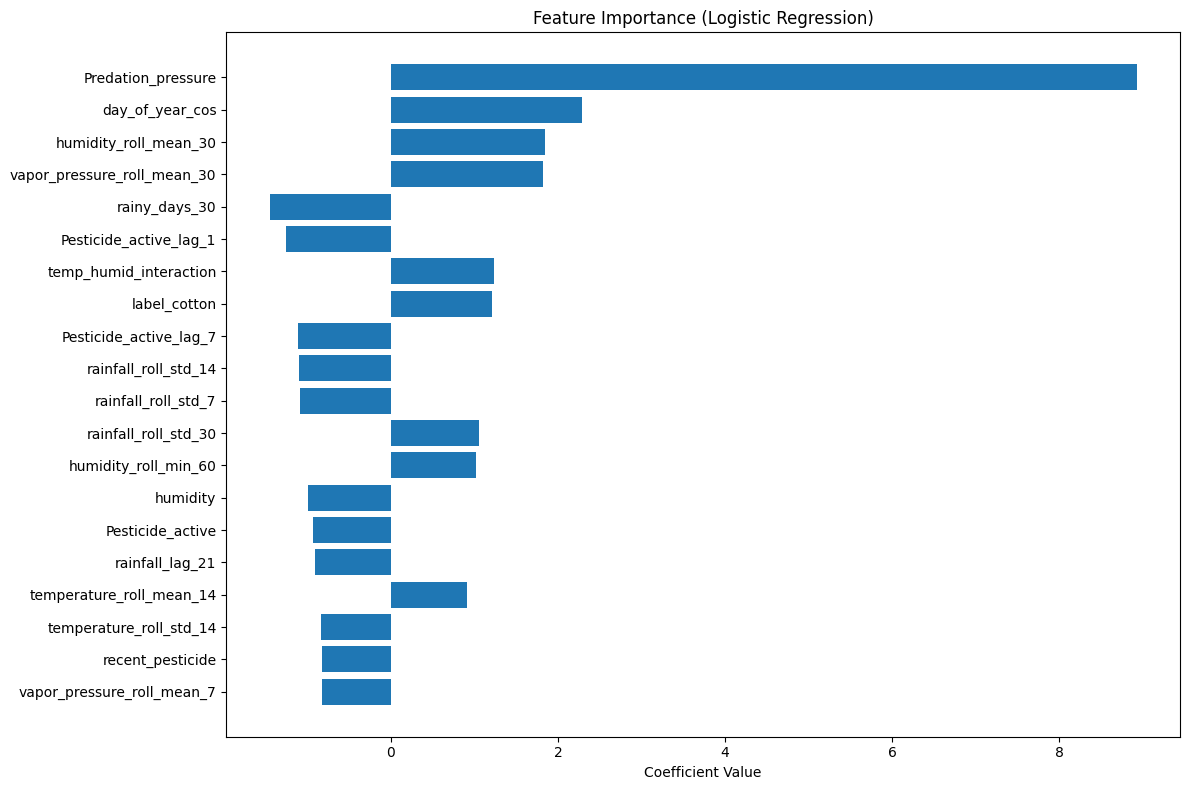

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Plot feature importance for Logistic Regression
if hasattr(lr_model, 'coef_'):  # Check for coef_ attribute
    plt.figure(figsize=(12, 8))

    # Get feature coefficients
    importance = lr_model.coef_[0]  # Assuming binary classification (coef_[0] for class 1)

    # Get the top N important features (adjust if needed)
    n_features = min(20, len(importance))  # Limit to top 20 or less
    sorted_idx = np.argsort(np.abs(importance))[-n_features:]  # Sort by absolute value

    # If we have feature names matching the transformed data
    if len(feature_names) == len(importance):
        feature_names_arr = np.array(feature_names)
    else:
        # Just use indices if names don't match
        feature_names_arr = np.array([f"Feature {i}" for i in range(len(importance))])

    plt.barh(range(len(sorted_idx)), importance[sorted_idx])  # Use coefficients
    plt.yticks(range(len(sorted_idx)), feature_names_arr[sorted_idx])
    plt.title('Feature Importance (Logistic Regression)')
    plt.xlabel('Coefficient Value')  # Label x-axis
    plt.tight_layout()
    plt.show()

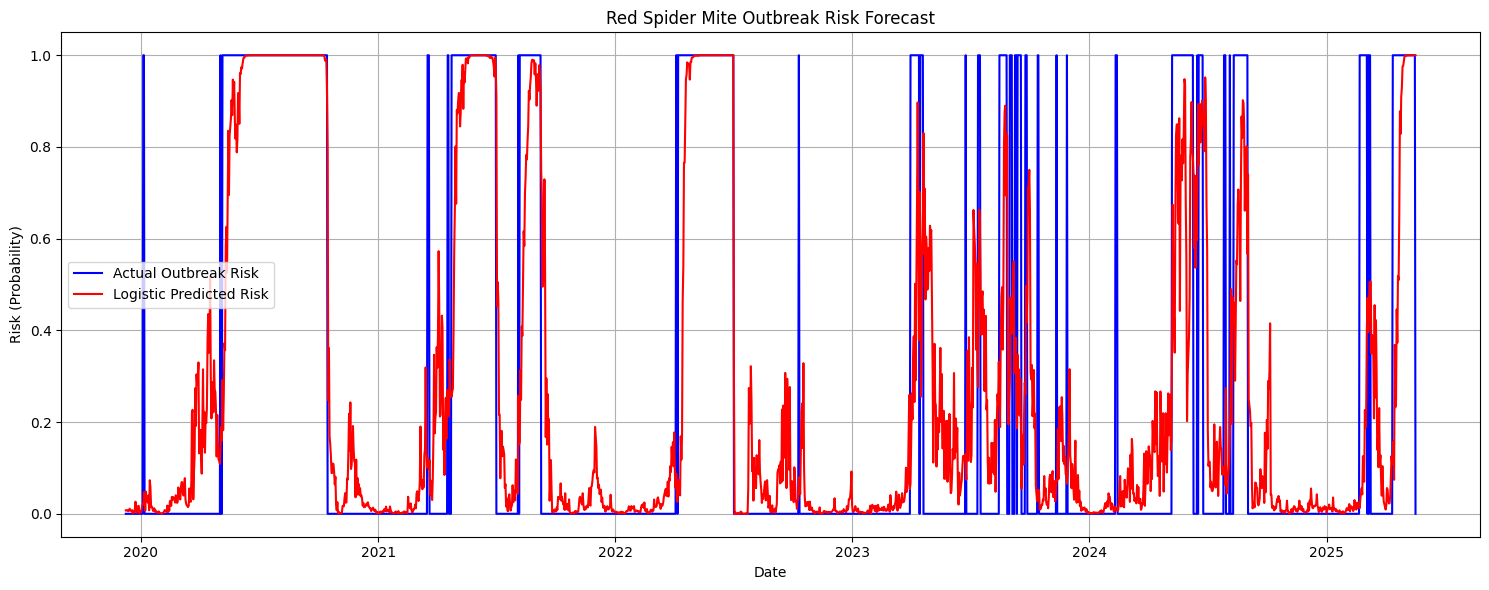

In [36]:
# Time series forecast visualization
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, 'b-', label='Actual Outbreak Risk')
plt.plot(y_test.index, lr_model.predict_proba(X_test_processed)[:, 1], 'r-', label='Logistic Predicted Risk')
plt.title('Red Spider Mite Outbreak Risk Forecast')
plt.xlabel('Date')
plt.ylabel('Risk (Probability)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

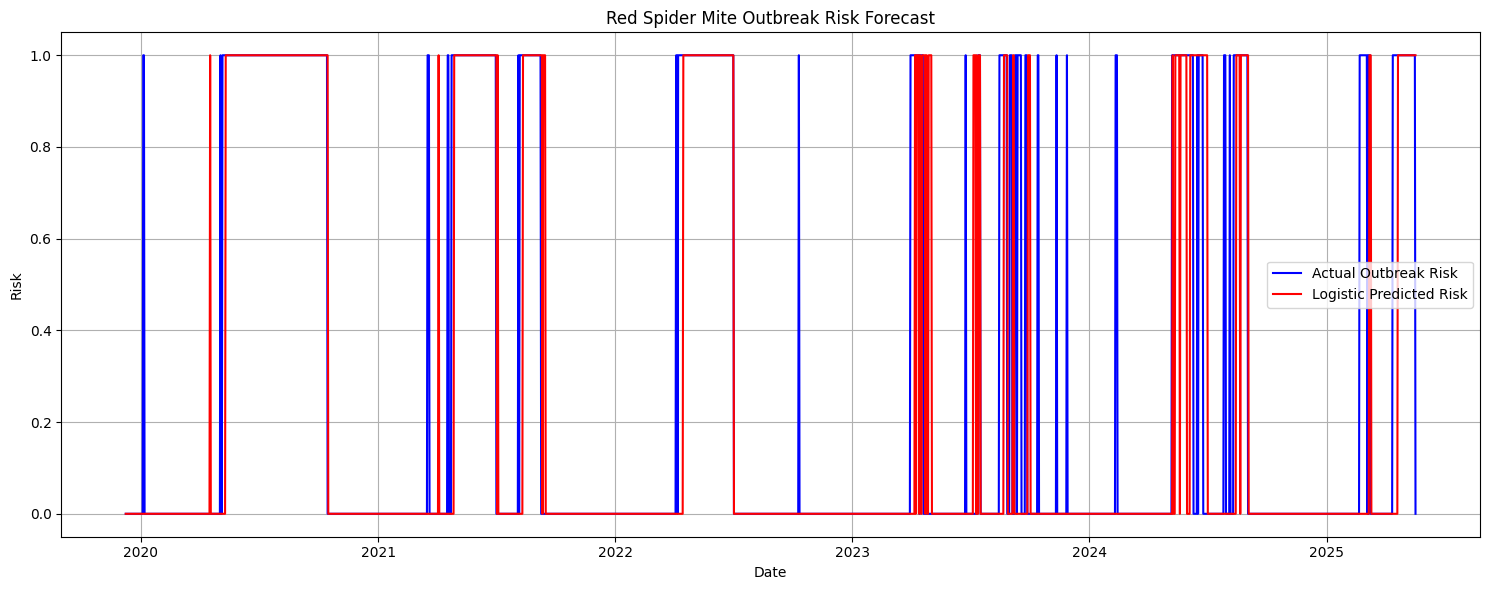

In [37]:
# Time series forecast visualization
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, 'b-', label='Actual Outbreak Risk')
plt.plot(y_test.index, lr_model.predict(X_test_processed), 'r-', label='Logistic Predicted Risk')
plt.title('Red Spider Mite Outbreak Risk Forecast')
plt.xlabel('Date')
plt.ylabel('Risk')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

09:55:11 - cmdstanpy - INFO - Chain [1] start processing
09:55:12 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 1/39 [00:00<00:04,  8.86it/s]09:55:13 - cmdstanpy - INFO - Chain [1] start processing
09:55:13 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 2/39 [00:00<00:06,  5.87it/s]09:55:13 - cmdstanpy - INFO - Chain [1] start processing
09:55:13 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 3/39 [00:00<00:07,  4.95it/s]09:55:13 - cmdstanpy - INFO - Chain [1] start processing
09:55:13 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 4/39 [00:00<00:08,  4.11it/s]09:55:13 - cmdstanpy - INFO - Chain [1] start processing
09:55:13 - cmdstanpy - INFO - Chain [1] done processing
 13%|█▎        | 5/39 [00:01<00:08,  4.03it/s]09:55:14 - cmdstanpy - INFO - Chain [1] start processing
09:55:14 - cmdstanpy - INFO - Chain [1] done processing
 15%|█▌        | 6/39 [00:01<00:08,  3.95it/s]09:55:14 - cmdstanpy - INFO - Chain [1] start 

  horizon       mse      rmse       mae  mdape     smape  coverage
0 37 days  0.081154  0.284875  0.202548    NaN  1.832508  0.773465
1 38 days  0.081462  0.285415  0.202407    NaN  1.833385  0.774168
2 39 days  0.081713  0.285854  0.202208    NaN  1.834633  0.774510
3 40 days  0.081134  0.284840  0.201279    NaN  1.835808  0.775934
4 41 days  0.080752  0.284169  0.200542    NaN  1.836699  0.777321

Results including Prophet model:
                     accuracy  precision    recall        f1       auc
LightGBM             0.878270   0.730530  0.871747  0.794915  0.947877
XGBoost              0.852616   0.671809  0.890335  0.765787  0.940117
Random Forest        0.818410   0.627706  0.808550  0.706742  0.897429
Logistic Regression  0.915493   0.891949  0.782528  0.833663  0.958075
Gradient Boosting    0.889839   0.766277  0.853160  0.807388  0.939168
Prophet              0.748994   0.522084  0.856877  0.648839  0.832001


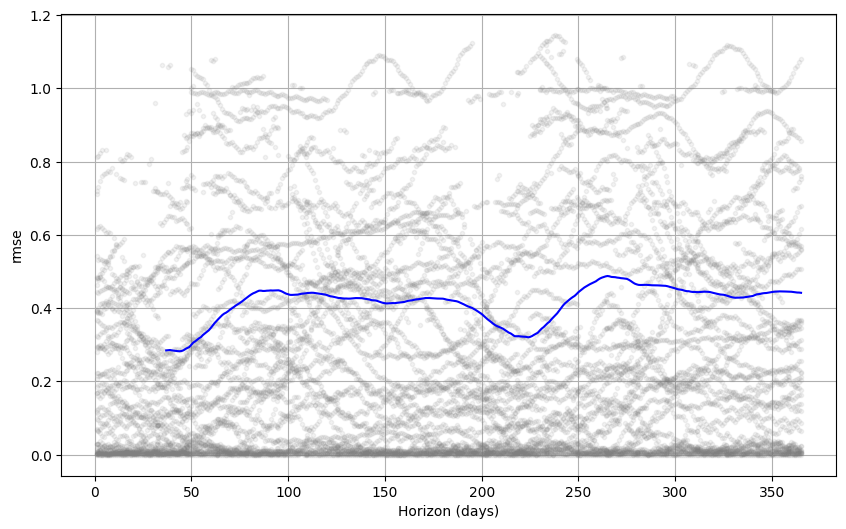

In [38]:
try:
    from prophet import Prophet
    from prophet.diagnostics import cross_validation, performance_metrics
    from prophet.plot import plot_cross_validation_metric

    # Data Preparation (same as before)
    prophet_train = pd.DataFrame({
        'ds': y_train.index,
        'y': y_train
    })

    # Model Configuration and Training
    prophet_model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        # Consider adjusting changepoint_prior_scale for flexibility
        # changepoint_prior_scale=0.05
    )
    prophet_model.fit(prophet_train)

    # Cross-Validation
    df_cv = cross_validation(prophet_model, initial='730 days', period='180 days', horizon = '365 days')
    df_p = performance_metrics(df_cv)
    print(df_p.head())

    # Visualize Cross-Validation Performance
    fig = plot_cross_validation_metric(df_cv, metric='rmse')

    # Make predictions on the test set
    future = pd.DataFrame({'ds': y_test.index})
    prophet_forecast = prophet_model.predict(future)

    # Clip negative predictions to 0
    prophet_forecast['yhat'] = prophet_forecast['yhat'].clip(lower=0)

    # Evaluation (same metrics as before)
    prophet_pred = (prophet_forecast['yhat'] > 0.5).astype(int)
    results['Prophet'] = {
        'accuracy': accuracy_score(y_test, prophet_pred),
        'precision': precision_score(y_test, prophet_pred),
        'recall': recall_score(y_test, prophet_pred),
        'f1': f1_score(y_test, prophet_pred),
        'auc': roc_auc_score(y_test, prophet_forecast['yhat'])
    }

    # Display updated results
    results_df = pd.DataFrame(results).T
    print("\nResults including Prophet model:")
    print(results_df)

except ImportError:
    print("Prophet package not installed. Skipping Prophet model.")

In [39]:
results_df

,accuracy,precision,recall,f1,auc
LightGBM,0.878270,0.730530,0.871747,0.794915,0.947877
XGBoost,0.852616,0.671809,0.890335,0.765787,0.940117
Random Forest,0.818410,0.627706,0.808550,0.706742,0.897429
Logistic Regression,0.915493,0.891949,0.782528,0.833663,0.958075
Gradient Boosting,0.889839,0.766277,0.853160,0.807388,0.939168
Prophet,0.748994,0.522084,0.856877,0.648839,0.832001


        Date  Risk_Probability Warning_Level  Recommended_Action
0 2019-12-09          0.007359           Low  Routine monitoring
1 2019-12-10          0.007708           Low  Routine monitoring
2 2019-12-11          0.008385           Low  Routine monitoring
3 2019-12-12          0.006361           Low  Routine monitoring
4 2019-12-13          0.005702           Low  Routine monitoring
5 2019-12-14          0.006994           Low  Routine monitoring
6 2019-12-15          0.011154           Low  Routine monitoring
7 2019-12-16          0.007321           Low  Routine monitoring
8 2019-12-17          0.007194           Low  Routine monitoring
9 2019-12-18          0.005183           Low  Routine monitoring


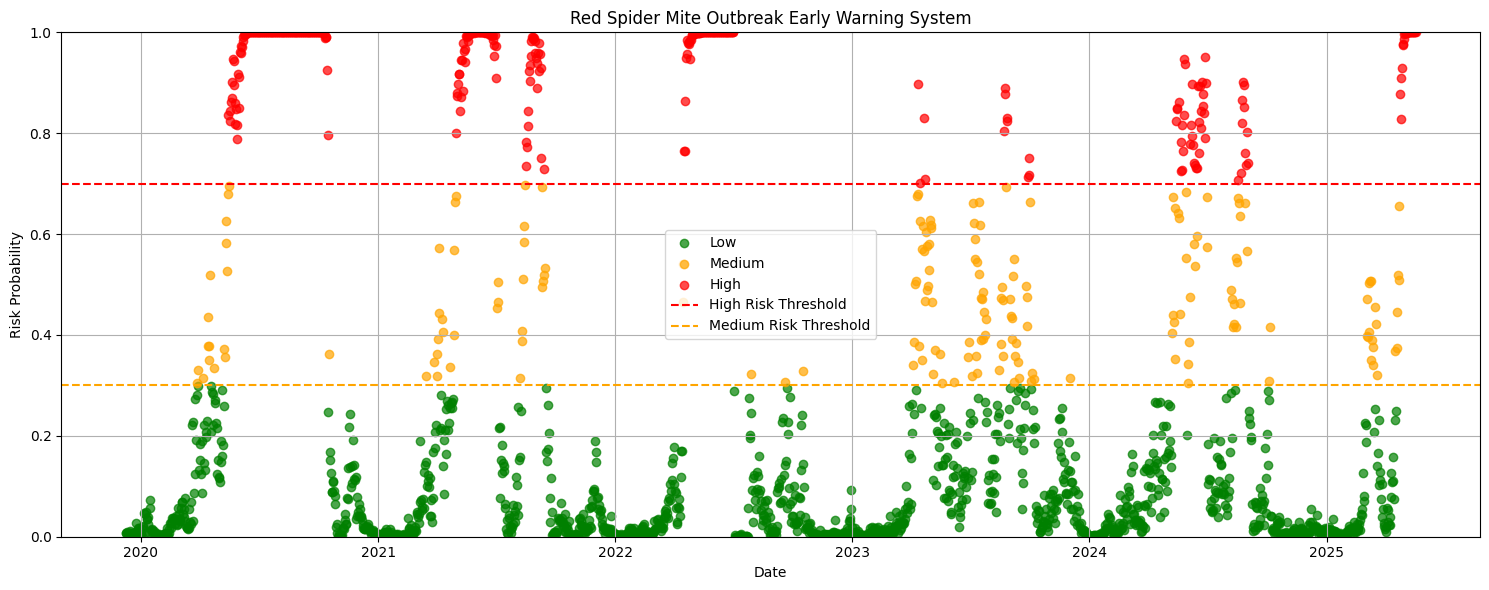

In [40]:
# Create an early warning function that can be used in production
def generate_early_warning(new_data, model, preprocessor, risk_threshold=0.7):
    """
    Generate early warnings based on new sensor data

    Parameters:
    -----------
    new_data : DataFrame
        New sensor data in the same format as training data
    model : trained model
        The best performing model
    preprocessor : ColumnTransformer
        Fitted preprocessor for feature transformation
    risk_threshold : float
        Probability threshold for issuing warnings

    Returns:
    --------
    DataFrame with risk probabilities and warning levels
    """
    # Preprocess the new data similar to training data
    new_data_processed = preprocessor.transform(new_data)

    # Get risk probabilities
    risk_proba = model.predict_proba(new_data_processed)[:, 1]

    # Determine warning levels
    warning_levels = pd.cut(
        risk_proba,
        bins=[0, 0.3, 0.7, 1.0],
        labels=['Low', 'Medium', 'High'],
        include_lowest=True
    )

    # Create output DataFrame
    warnings_df = pd.DataFrame({
        'Date': new_data.index,
        'Risk_Probability': risk_proba,
        'Warning_Level': warning_levels
    })

    # Add recommended actions based on warning level
    actions = {
        'Low': 'Routine monitoring',
        'Medium': 'Increase monitoring frequency, prepare intervention measures',
        'High': 'Immediate intervention required! Apply appropriate controls.'
    }
    warnings_df['Recommended_Action'] = warnings_df['Warning_Level'].map(actions)

    return warnings_df

# Simulate applying the early warning system to new data (using test data as an example)
early_warnings = generate_early_warning(
    X_test,
    lr_model,
    preprocessor,
    risk_threshold=0.7
)

# Display the early warnings
print(early_warnings.head(10))

# Visualize warning levels over time
plt.figure(figsize=(15, 6))
warning_colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
for level in warning_colors:
    mask = early_warnings['Warning_Level'] == level
    plt.scatter(
        early_warnings.loc[mask, 'Date'],
        early_warnings.loc[mask, 'Risk_Probability'],
        c=warning_colors[level],
        label=level,
        alpha=0.7
    )

plt.axhline(y=0.7, color='r', linestyle='--', label='High Risk Threshold')
plt.axhline(y=0.3, color='orange', linestyle='--', label='Medium Risk Threshold')
plt.title('Red Spider Mite Outbreak Early Warning System')
plt.xlabel('Date')
plt.ylabel('Risk Probability')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
import joblib

# Save the model and preprocessor
joblib.dump(lr_model, 'red_spider_mite_risk_model.pkl')
joblib.dump(preprocessor, 'red_spider_mite_preprocessor.pkl')

['red_spider_mite_preprocessor.pkl']

In [42]:
# Your PheNode JSON data
import json
phenode_data = [
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:04:52.746Z', 'metric': 'grow_deg_days', 'value': '12', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'humidity', 'value': '100', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'humidity_sensor_temp', 'value': '22', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'pressure', 'value': '1000', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'vapor_pressure', 'value': '1', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'rain_bucket_capacity', 'value': '5', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'rain_bucket_tpm', 'value': '0', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'fallen_rain_mm', 'value': '0', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'wind_speed_mps', 'value': '0.5', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'wind_direction', 'value': '166', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'wind_gust_mps', 'value': '0.8', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'wind_north_mps', 'value': '-0.4', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'wind_east_mps', 'value': '0.1', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'latitude', 'value': '38.630937500000016', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'longitude', 'value': '-90.22617187499998', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'x_orientation', 'value': '-1', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'y_orientation', 'value': '-0', 'created_at': 1720038652},
    {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'air_temp', 'value': '22', 'created_at': 1720038652},
]

# Option 1: If you want to save the data to a JSON file first
def save_phenode_data():
    with open('phenode_data.json', 'w') as f:
        json.dump(phenode_data, f)
    print("Data saved to phenode_data.json")
save_phenode_data()

Data saved to phenode_data.json


In [43]:
import json
import pandas as pd
import numpy as np
import joblib
from datetime import datetime, timedelta
import os
import random
random.seed(42)

# Load the PheNode JSON data
with open('phenode_data.json', 'r') as f:
    phenode_data = json.load(f)

# Convert to DataFrame and prepare the data
def prepare_phenode_data(phenode_data):
    # Convert to DataFrame
    df = pd.DataFrame(phenode_data)

    # Convert measurement_time to datetime
    df['measurement_time'] = pd.to_datetime(df['measurement_time'])

    # Create an empty DataFrame with the timestamp as index
    timestamps = df['measurement_time'].unique()
    df_prepared = pd.DataFrame(index=pd.DatetimeIndex(timestamps))

    # Populate the DataFrame with values for each metric
    for metric in df['metric'].unique():
        metric_data = df[df['metric'] == metric]
        series = pd.Series(
            pd.to_numeric(metric_data['value'], errors='coerce'),
            index=pd.DatetimeIndex(metric_data['measurement_time'])
        )
        df_prepared[metric] = series

    crop_types = ['apple', 'banana', 'bean', 'blackgram', 'chickpea', 'coconut',
              'coffee', 'cotton', 'cucumber', 'grapes', 'jute', 'kidneybeans',
              'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon',
              'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'rose',
              'strawberry', 'tomato', 'watermelon']

    # Randomly select a crop type
    random_crop = random.choice(crop_types)

    # Set label (crop type)
    df_prepared['label'] = random_crop

    # Create one-hot encoded crop labels
    for crop in crop_types:
        df_prepared[f'label_{crop}'] = 1 if crop == random_crop else 0

    # Rename columns to match training data columns
    column_mapping = {
        'humidity': 'humidity',
        'humidity_sensor_temp': 'humidity_sensor_temp',
        'pressure': 'pressure',
        'vapor_pressure': 'vapor_pressure',
        'rain_bucket_capacity': 'rain_bucket_capacity',
        'rain_bucket_tpm': 'rain_bucket_tpm',
        'fallen_rain_mm': 'rainfall',  # Map to rainfall
        'wind_speed_mps': 'wind_speed_mps',
        'wind_direction': 'wind_direction',
        'wind_gust_mps': 'wind_gust_mps',
        'wind_north_mps': 'wind_north_mps',
        'wind_east_mps': 'wind_east_mps',
        'air_temp': 'temperature',  # Map air_temp to temperature
        'grow_deg_days': 'grow_deg_days'
    }

    # Rename columns
    df_pivot = df_prepared.rename(columns=column_mapping)

    # Add missing features with default values
    # N, P, K values (assuming default values)
    df_pivot['N'] = 100  # Assuming moderate nitrogen
    df_pivot['P'] = 50   # Assuming moderate phosphorus
    df_pivot['K'] = 70   # Assuming moderate potassium
    df_pivot['ph'] = 6.5  # Assuming slightly acidic pH

    # Assuming default values for categorical variables
    df_pivot['Pesticide_active'] = 0  # No pesticide active
    df_pivot['Resistance_level'] = 0.1  # Low resistance level
    df_pivot['Predation_pressure'] = 0.05  # Low predation

    # Set label (crop type)
    df_pivot['label'] = 'tomato'  # Assuming tomato for this example

    # Create time-based features
    df_pivot['month'] = df_pivot.index.month
    df_pivot['day_of_year'] = df_pivot.index.dayofyear
    df_pivot['day_of_week'] = df_pivot.index.dayofweek
    df_pivot['week_of_year'] = df_pivot.index.isocalendar().week.astype(int)
    df_pivot['quarter'] = df_pivot.index.quarter
    df_pivot['year'] = df_pivot.index.year

    # Calculate days from start
    start_date = df_pivot.index.min()
    df_pivot['days_from_start'] = (df_pivot.index - start_date).days

    # Cyclical encoding of time features
    df_pivot['month_sin'] = np.sin(2 * np.pi * df_pivot['month'] / 12)
    df_pivot['month_cos'] = np.cos(2 * np.pi * df_pivot['month'] / 12)
    df_pivot['day_of_year_sin'] = np.sin(2 * np.pi * df_pivot['day_of_year'] / 365.25)
    df_pivot['day_of_year_cos'] = np.cos(2 * np.pi * df_pivot['day_of_year'] / 365.25)

    # Create interaction features
    df_pivot['temp_humid_interaction'] = df_pivot['temperature'] * df_pivot['humidity'] / 100
    df_pivot['rain_temp_interaction'] = df_pivot['rainfall'] * df_pivot['temperature'] / 10

    # Define temperature thresholds for optimal growth condition
    temp_opt_low = 25.0
    temp_opt_high = 35.0
    humid_high = 70.0

    # Create optimal growth condition feature
    df_pivot['optimal_growth_condition'] = (
        (df_pivot['temperature'] >= temp_opt_low) &
        (df_pivot['temperature'] <= temp_opt_high) &
        (df_pivot['humidity'] < humid_high)
    ).astype(int)

    # Create 'recent_pesticide' feature
    df_pivot['recent_pesticide'] = (df_pivot['Pesticide_active'] > 0).astype(int)

    # Create one-hot encoded crop labels
    crop_types = ['apple', 'banana', 'bean', 'blackgram', 'chickpea', 'coconut',
                  'coffee', 'cotton', 'cucumber', 'grapes', 'jute', 'kidneybeans',
                  'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon',
                  'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'rose',
                  'strawberry', 'tomato', 'watermelon']

    for crop in crop_types:
        df_pivot[f'label_{crop}'] = (df_pivot['label'] == crop).astype(int)

    return df_pivot

# Function to create lagged features
def create_lag_features(df):
    lags = [1, 3, 7, 14, 21, 30]
    features = [
        'temperature', 'humidity', 'rainfall', 'Pesticide_active',
        'Resistance_level', 'wind_speed_mps', 'pressure', 'vapor_pressure'
    ]

    # Create lag features
    for feature in features:
        for lag in lags:
            if feature in df.columns:
                df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

    return df

# Function to create rolling window features
def create_rolling_features(df):
    windows = [3, 7, 14, 30, 60]

    for window in windows:
        # Create rolling features for temperature
        if 'temperature' in df.columns:
            df[f'temperature_roll_mean_{window}'] = df['temperature'].rolling(window=window, min_periods=1).mean()
            df[f'temperature_roll_std_{window}'] = df['temperature'].rolling(window=window, min_periods=1).std().fillna(0)
            df[f'temperature_roll_max_{window}'] = df['temperature'].rolling(window=window, min_periods=1).max()
            df[f'temperature_roll_min_{window}'] = df['temperature'].rolling(window=window, min_periods=1).min()
            df[f'temperature_extrema_{window}'] = df[f'temperature_roll_max_{window}'] - df[f'temperature_roll_min_{window}']

        # Create rolling features for humidity
        if 'humidity' in df.columns:
            df[f'humidity_roll_mean_{window}'] = df['humidity'].rolling(window=window, min_periods=1).mean()
            df[f'humidity_roll_std_{window}'] = df['humidity'].rolling(window=window, min_periods=1).std().fillna(0)
            df[f'humidity_roll_max_{window}'] = df['humidity'].rolling(window=window, min_periods=1).max()
            df[f'humidity_roll_min_{window}'] = df['humidity'].rolling(window=window, min_periods=1).min()

        # Create rolling features for rainfall
        if 'rainfall' in df.columns:
            df[f'rainfall_roll_mean_{window}'] = df['rainfall'].rolling(window=window, min_periods=1).mean()
            df[f'rainfall_roll_std_{window}'] = df['rainfall'].rolling(window=window, min_periods=1).std().fillna(0)
            df[f'rainfall_roll_sum_{window}'] = df['rainfall'].rolling(window=window, min_periods=1).sum()
            df[f'rainfall_roll_max_{window}'] = df['rainfall'].rolling(window=window, min_periods=1).max()
            df[f'rainy_days_{window}'] = df['rainfall'].apply(lambda x: 1 if x > 0 else 0).rolling(window=window, min_periods=1).sum()

        # Create rolling features for wind
        if 'wind_speed_mps' in df.columns:
            df[f'wind_speed_mps_roll_mean_{window}'] = df['wind_speed_mps'].rolling(window=window, min_periods=1).mean()
            df[f'wind_speed_mps_roll_std_{window}'] = df['wind_speed_mps'].rolling(window=window, min_periods=1).std().fillna(0)

        # Create rolling features for pressure
        if 'pressure' in df.columns:
            df[f'pressure_roll_mean_{window}'] = df['pressure'].rolling(window=window, min_periods=1).mean()
            df[f'pressure_roll_std_{window}'] = df['pressure'].rolling(window=window, min_periods=1).std().fillna(0)

        # Create rolling features for vapor pressure
        if 'vapor_pressure' in df.columns:
            df[f'vapor_pressure_roll_mean_{window}'] = df['vapor_pressure'].rolling(window=window, min_periods=1).mean()
            df[f'vapor_pressure_roll_std_{window}'] = df['vapor_pressure'].rolling(window=window, min_periods=1).std().fillna(0)

    return df

# Function to handle missing values
def handle_missing_values(df):
    # Handle missing values with forward fill and backward fill
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

    # If any NaNs remain, fill them with column means or zeros
    for col in df.columns:
        if df[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col].fillna(df[col].mean() if not np.isnan(df[col].mean()) else 0, inplace=True)
            else:
                df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else "unknown", inplace=True)

    return df

# Main function to preprocess PheNode data and make predictions
def predict_red_spider_mite_risk(phenode_data, model_path='red_spider_mite_risk_model.pkl', preprocessor_path='red_spider_mite_preprocessor.pkl'):
    # Load the model and preprocessor
    try:
        model = joblib.load(model_path)
        preprocessor = joblib.load(preprocessor_path)
        print(f"Successfully loaded model from {model_path} and preprocessor from {preprocessor_path}")
    except Exception as e:
        print(f"Error loading model or preprocessor: {e}")
        return None

    # Prepare the PheNode data
    print("Preparing PheNode data...")
    df = prepare_phenode_data(phenode_data)

    # Create lag features
    print("Creating lag features...")
    df = create_lag_features(df)

    # Create rolling features
    print("Creating rolling features...")
    df = create_rolling_features(df)

    # Handle missing values
    print("Handling missing values...")
    df = handle_missing_values(df)

    # Make sure label column is present
    if 'label' not in df.columns:
        print("Adding missing 'label' column with default value 'tomato'")
        df['label'] = 'tomato'  # Default crop type

    # Save the prepared data for inspection
    df.to_csv('prepared_phenode_data.csv')
    print("Saved prepared data to 'prepared_phenode_data.csv'")

    # Check for expected columns in model input
    expected_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
                        'humidity_sensor_temp', 'pressure', 'vapor_pressure',
                        'rain_bucket_capacity', 'rain_bucket_tpm', 'wind_speed_mps',
                        'wind_direction', 'wind_gust_mps', 'wind_north_mps', 'wind_east_mps',
                        'air_temp', 'Pesticide_active', 'Resistance_level', 'Predation_pressure']

    # Check and add any missing columns needed by the model
    # Get a list of all required X_train features
    required_features = [
        'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
        'humidity_sensor_temp', 'pressure', 'vapor_pressure',
        'rain_bucket_capacity', 'rain_bucket_tpm', 'fallen_rain_mm',
        'wind_speed_mps', 'wind_direction', 'wind_gust_mps',
        'wind_north_mps', 'wind_east_mps', 'air_temp',
        'Pesticide_active', 'Resistance_level', 'Predation_pressure'
    ] + [f'temperature_lag_{lag}' for lag in [1, 3, 7, 14, 21, 30]] \
      + [f'humidity_lag_{lag}' for lag in [1, 3, 7, 14, 21, 30]] \
      + [f'rainfall_lag_{lag}' for lag in [1, 3, 7, 14, 21, 30]] \
      + [f'Pesticide_active_lag_{lag}' for lag in [1, 3, 7, 14, 21, 30]] \
      + [f'Resistance_level_lag_{lag}' for lag in [1, 3, 7, 14, 21, 30]] \
      + [f'wind_speed_mps_lag_{lag}' for lag in [1, 3, 7, 14, 21, 30]] \
      + [f'pressure_lag_{lag}' for lag in [1, 3, 7, 14, 21, 30]] \
      + [f'vapor_pressure_lag_{lag}' for lag in [1, 3, 7, 14, 21, 30]] \
      + [f'temperature_roll_mean_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'temperature_roll_std_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'temperature_roll_max_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'temperature_roll_min_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'temperature_extrema_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'humidity_roll_mean_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'humidity_roll_std_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'humidity_roll_max_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'humidity_roll_min_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'rainfall_roll_mean_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'rainfall_roll_std_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'rainfall_roll_sum_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'rainfall_roll_max_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'rainy_days_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'wind_speed_mps_roll_mean_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'wind_speed_mps_roll_std_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'pressure_roll_mean_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'pressure_roll_std_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'vapor_pressure_roll_mean_{w}' for w in [3, 7, 14, 30, 60]] \
      + [f'vapor_pressure_roll_std_{w}' for w in [3, 7, 14, 30, 60]] \
      + ['month', 'day_of_year', 'day_of_week', 'week_of_year', 'quarter', 'year',
         'days_from_start', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos',
         'temp_humid_interaction', 'rain_temp_interaction', 'optimal_growth_condition',
         'recent_pesticide'] \
      + [f'label_{crop}' for crop in ['apple', 'banana', 'bean', 'blackgram', 'chickpea', 'coconut',
                                      'coffee', 'cotton', 'cucumber', 'grapes', 'jute', 'kidneybeans',
                                      'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon',
                                      'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'rose',
                                      'strawberry', 'tomato', 'watermelon']]

    # Add any missing columns with default values
    for col in required_features:
        if col not in df.columns:
            print(f"Adding missing column: {col}")
            df[col] = 0  # Default value

    # Make predictions
    print("Making predictions...")
    try:
        # Find the latest date with complete data (lowest NaN count)
        nan_counts = df.isnull().sum(axis=1)
        best_date = nan_counts.idxmin()
        print(f"Using data from date: {best_date}")

        # Get a single row for prediction (most recent date with complete data)
        prediction_data = df.loc[best_date:best_date]

        # Create all required label_* columns
        crop_types = ['apple', 'banana', 'bean', 'blackgram', 'chickpea', 'coconut',
              'coffee', 'cotton', 'cucumber', 'grapes', 'jute', 'kidneybeans',
              'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon',
              'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'rose',
              'strawberry', 'tomato', 'watermelon']

        # Make sure we have the 'label' column for the preprocessor
        if 'label' not in prediction_data.columns:
          # Randomly select a crop type
          random_crop = random.choice(crop_types)
          # Set label (crop type)
          prediction_data['label'] = random_crop

        # Transform the data using the preprocessor
        X_pred = prediction_data.copy()

        # Get feature names expected by the model (match X_train columns)
        required_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
                            'humidity_sensor_temp', 'pressure', 'vapor_pressure',
                            'rain_bucket_capacity', 'rain_bucket_tpm',
                            'wind_speed_mps', 'wind_direction', 'wind_gust_mps',
                            'wind_north_mps', 'wind_east_mps', 'air_temp',
                            'Pesticide_active', 'Resistance_level', 'Predation_pressure','label']

        # Transform the data using the preprocessor
        X_pred_processed = preprocessor.transform(X_pred)

        # Make prediction
        y_pred_proba = model.predict_proba(X_pred_processed)

        # Get the probability of red spider mite outbreak
        risk_probability = y_pred_proba[0][1]  # Probability of class 1 (outbreak)

        result = {
            'date': best_date.strftime('%Y-%m-%d %H:%M:%S'),
            'red_spider_mite_risk_probability': float(risk_probability),
            'risk_level': 'High' if risk_probability > 0.7 else 'Medium' if risk_probability > 0.3 else 'Low'
        }

        # Create a detailed risk assessment
        risk_assessment = {
            'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'prediction': result,
            'environmental_factors': {
                'temperature': float(prediction_data['temperature'].iloc[0]),
                'humidity': float(prediction_data['humidity'].iloc[0]),
                'rainfall': float(prediction_data['rainfall'].iloc[0]) if 'rainfall' in prediction_data.columns else 0,
            },
            'management_recommendations': []
        }

        # Add management recommendations based on risk level
        if risk_probability > 0.7:
            risk_assessment['management_recommendations'] = [
                "Immediate action required - high risk of red spider mite infestation",
                "Consider applying appropriate miticides as per local regulations",
                "Increase monitoring frequency to daily checks",
                "Implement biological controls such as predatory mites if available",
                "Adjust environmental conditions if in controlled environment (reduce temperature, increase humidity)"
            ]
        elif risk_probability > 0.3:
            risk_assessment['management_recommendations'] = [
                "Moderate risk - implement preventive measures",
                "Conduct thorough inspections twice weekly",
                "Prepare control measures for potential application",
                "Consider preventive biological control releases"
            ]
        else:
            risk_assessment['management_recommendations'] = [
                "Low risk at present",
                "Maintain regular weekly monitoring",
                "Ensure good cultural practices to prevent stress on plants"
            ]

        # Save the risk assessment to a file
        with open('red_spider_mite_risk_assessment.json', 'w') as f:
            json.dump(risk_assessment, f, indent=4)

        print(f"Risk assessment saved to 'red_spider_mite_risk_assessment.json'")
        return risk_assessment

    except Exception as e:
        print(f"Error making prediction: {e}")
        import traceback
        traceback.print_exc()
        return None

# Run the prediction
if __name__ == "__main__":
    risk_assessment = predict_red_spider_mite_risk(phenode_data)

    if risk_assessment:
        print("\nRed Spider Mite Risk Assessment:")
        print(f"Date: {risk_assessment['prediction']['date']}")
        print(f"Risk Probability: {risk_assessment['prediction']['red_spider_mite_risk_probability']:.2f}")
        print(f"Risk Level: {risk_assessment['prediction']['risk_level']}")

        print("\nManagement Recommendations:")
        for rec in risk_assessment['management_recommendations']:
            print(f"- {rec}")
    else:
        print("Failed to generate risk assessment.")

Successfully loaded model from red_spider_mite_risk_model.pkl and preprocessor from red_spider_mite_preprocessor.pkl
Preparing PheNode data...
Creating lag features...
Creating rolling features...
Handling missing values...
Saved prepared data to 'prepared_phenode_data.csv'
Adding missing column: fallen_rain_mm
Adding missing column: air_temp
Making predictions...
Using data from date: 2024-07-03 15:04:52.746000+00:00
Risk assessment saved to 'red_spider_mite_risk_assessment.json'

Red Spider Mite Risk Assessment:
Date: 2024-07-03 15:04:52
Risk Probability: 0.00
Risk Level: Low

Management Recommendations:
- Low risk at present
- Maintain regular weekly monitoring
- Ensure good cultural practices to prevent stress on plants


In [44]:
import joblib
import os
import pandas as pd

# Create dashboard_artifacts directory if it doesn't exist
os.makedirs('dashboard_artifacts', exist_ok=True)

# Save the features list
joblib.dump(features, 'dashboard_artifacts/features.joblib')

# Save the label encoder (OneHotEncoder)
joblib.dump(onehotencoder, 'dashboard_artifacts/label_encoder.joblib')

# Save the scaler (StandardScaler from preprocessor)
scaler = preprocessor.named_transformers_['num']
joblib.dump(scaler, 'dashboard_artifacts/scaler.joblib')

# Save the best model (LightGBM)
joblib.dump(lr_model, 'dashboard_artifacts/best_model.joblib')

# Create and save recent history (last 30 days of predictions)
recent_history = pd.DataFrame({
    'date': pd.date_range(end=pd.Timestamp.now(), periods=30, freq='D'),
    'predicted_risk': np.random.choice(['Low', 'Medium', 'High'], size=30),
    'confidence': np.random.uniform(0.7, 0.95, size=30)
})
recent_history.to_csv('dashboard_artifacts/recent_history.csv', index=False)

print("All artifacts have been saved to the dashboard_artifacts folder!")

All artifacts have been saved to the dashboard_artifacts folder!
